# GATE output formats and Python

## GATE can output information in different formats:
* ASCII output
* ROOT tree output
* NumPy tree output (new!)
* Images (mhd, hdr) output

In [ ]:
# Module with scientific computing functions (matrix/vector)
import numpy as np                
# Module to read root files
import uproot


# GATE ASCII output


# Plot dose depth dose and uncertainty

In [65]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
# Load data from txt files
d_edep = np.loadtxt('Ex_Beam/output/1D-depth-Edep.txt')
d_uncert = np.loadtxt('Ex_Beam/output/1D-depth-Edep-Uncertainty.txt')

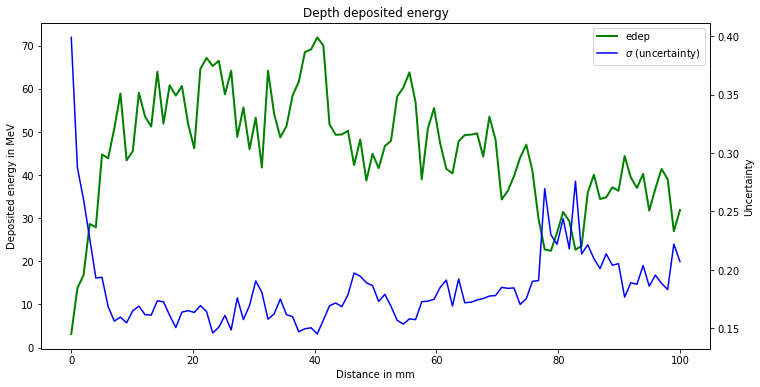

In [69]:
# Declare a single figure (one row, one column)
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(12, 6), facecolor='w')

# X values from 0 to n
# n is the length of d_edep
n = len(d_edep)
x = np.linspace(0, n, n)

# First curve, gamma depth in green
y = d_edep
c1 = ax.plot(x, y, 'g-', label='edep', linewidth=2)

# Second curve, gamma uncertainty in blue, share the same x axis, but use a
# different y axis
y = d_uncert
ax2 = ax.twinx()
c2 = ax2.plot(x, y, 'b-', label='$\sigma$ (uncertainty)')

# Add the legend and the title
lns = c1+c2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)
ax.set_title('Depth deposited energy')
ax.set_xlabel('Distance in mm')
ax.set_ylabel('Deposited energy in MeV')
f = ax2.set_ylabel('Uncertainty')

# GATE binary output

## List of interactions - binary format

In [72]:
# dtype line format for "scanner" GATE system binary output (26 columns)
dt=np.dtype([('run_ID', np.int32), ('event_ID', np.int32), ('primary_ID', np.int32), ('source_ID', np.int32), 
             ('level1_ID', np.int32), ('level2_ID', np.int32), ('level3_ID', np.int32), ('level4_ID', np.int32), 
             ('level5_ID', np.int32), ('layer0_ID', np.int32), ('layer1_ID', np.int32), 
             ('time', np.float64), ('energy', np.float64), ('range', np.float64), 
             ('x', np.float64), ('y', np.float64), ('z', np.float64), 
             ('G4code', np.int32), ('particle_ID', np.int32), ('mother_particle_ID', np.int32), ('photon_mother_ID', np.int32), 
             ('n_Compt', np.int32), ('n_Rayl', np.int32), 
             ('process', np.dtype('S8')), ('vol_Compt', np.dtype('S8')), ('vol_Rayl', np.dtype('S8'))])

data=np.fromfile('Ex_Beam/output/list-Hits.bin', dtype=dt)
print('Number of particles:', len(data))
print(data)

Number of particles: 706
[(0,  12, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0.013     , 4.47160788e-02, 2.10961936e-01, -1.85597649e+02, -7.79274433e+01, 449.58992414,  22,  1, 0, 0, 0, 0, b'phot', b'NULL', b'NULL')
 (0,  13, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0.014     , 8.55701865e+00, 9.59769271e-01,  1.59612215e+00,  3.05339277e+00, 450.45976927,  22,  1, 0, 1, 0, 0, b'compt', b'NULL', b'NULL')
 (0,  44, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0.045     , 6.49448618e-02, 1.27668455e-02, -2.38074551e+01,  1.55257120e+01, 449.51160785,  22,  8, 2, 0, 0, 0, b'phot', b'NULL', b'NULL')
 (0,  47, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0.048     , 1.05106035e-01, 2.99645843e-01,  8.39968227e+01,  9.27993430e+01, 449.79178833,  22,  8, 3, 1, 0, 0, b'phot', b'NULL', b'NULL')
 (0,  52, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0.053     , 0.00000000e+00, 3.04713562e-05, -2.14867715e+01,  8.15815473e+00, 449.50002673,  11,  2, 1, 0, 0, 0, b'msc', b'NULL', b'NULL')
 (0,  52, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0.053     , 4.76082487e-02, 6.50181450e-02, -2.150898

In [ ]:
# do this with the 3D dose

In [ ]:
# Declare a figure 
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(12, 6), facecolor='w')

# Third curve, gamma profile in green
n = len(p_edep)
x = np.linspace(0, n, n)
y = p_edep
c3 = ax.plot(x, y, 'g-', label='edep', linewidth=2)

# Last curve, gamma uncertainty profile
y = p_uncert
ax2 = ax.twinx()
c4 = ax2.plot(x, y, 'b-', label='$\sigma$ (uncertainty)')

# Add the legend and the title
lns = c3+c4
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)
ax.set_title('Deposited energy profile')
ax.set_xlabel('Distance in mm')
ax.set_ylabel('Deposited energy in MeV')
f = ax2.set_ylabel('Uncertainty')

## GATE ROOT tree output